In [23]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, auc
from datetime import datetime


In [24]:
df = pd.read_csv('./bq_predicts/bq_automl_13052025.csv', dtype={'user_pseudo_id': str})
df['user_pseudo_id'] = df['user_pseudo_id'].astype(str)
df.head()

,user_pseudo_id,conversion_flag,predicted_conversion_flag,conversion_probability
0,975035731.1744771171,0,1,0.981610
1,603114780.1744874973,0,1,0.980509
2,1121020747.1746265843,0,1,0.977900
3,1664456789.1745289433,0,1,0.977626
4,361695089.1743758779,0,1,0.977477


In [40]:
df = df[df['conversion_probability']>0.05]

probability_group
0-10%       12
10-20%     231
20-30%     389
30-40%     137
40-50%      56
50-60%      12
60-70%       7
70-80%     115
80-90%     133
90-100%     98
Name: count, dtype: int64


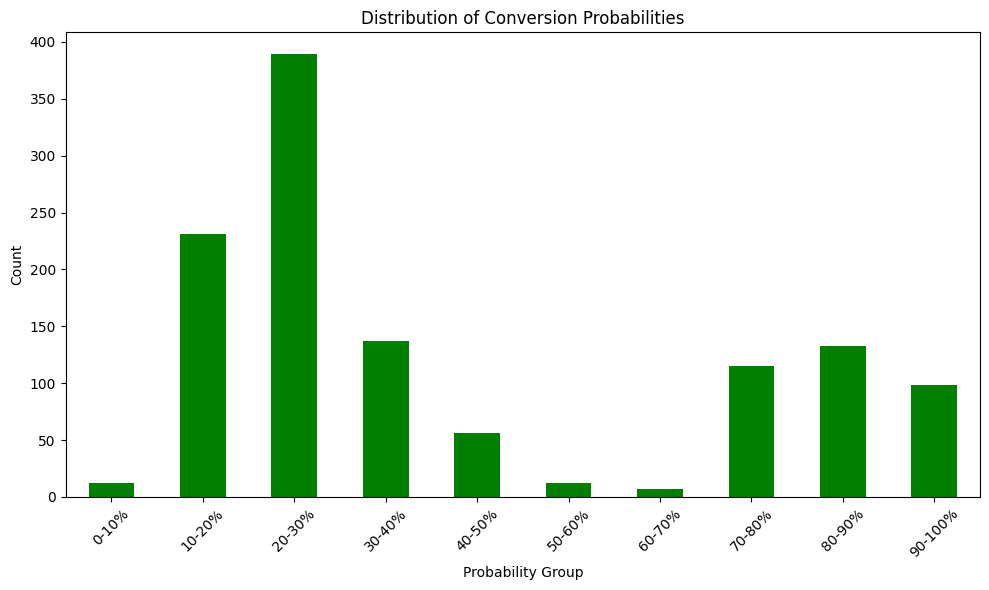

In [42]:
#classify conversion_probabilty in groups [0% to 10%], [10% to 20%], [20% to 30%], [30% to 40%], [40% to 50%], [50% to 60%], [60% to 70%], [70% to 80%], [80% to 90%], [90% to 100%
# Create bins for conversion probability from 0% to 100% in 10% increments
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']

# bins = [0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.0]
# labels = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%', '30-35%', '35-40%', '40-45%', '45-50%', '50-55%', '55-60%', '60-65%', '65-70%', '70-75%', '75-80%', '80-85%', '85-90%', '90-95%', '95-100%']

# Classify conversion probabilities into bins
df['probability_group'] = pd.cut(df['conversion_probability'], bins=bins, labels=labels, include_lowest=True)

# Display the count of records in each bin
prob_group_counts = df['probability_group'].value_counts().sort_index()
print(prob_group_counts)

# Visualize the distribution
plt.figure(figsize=(10, 6))
prob_group_counts.plot(kind='bar', color='green')
plt.title('Distribution of Conversion Probabilities')
plt.xlabel('Probability Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





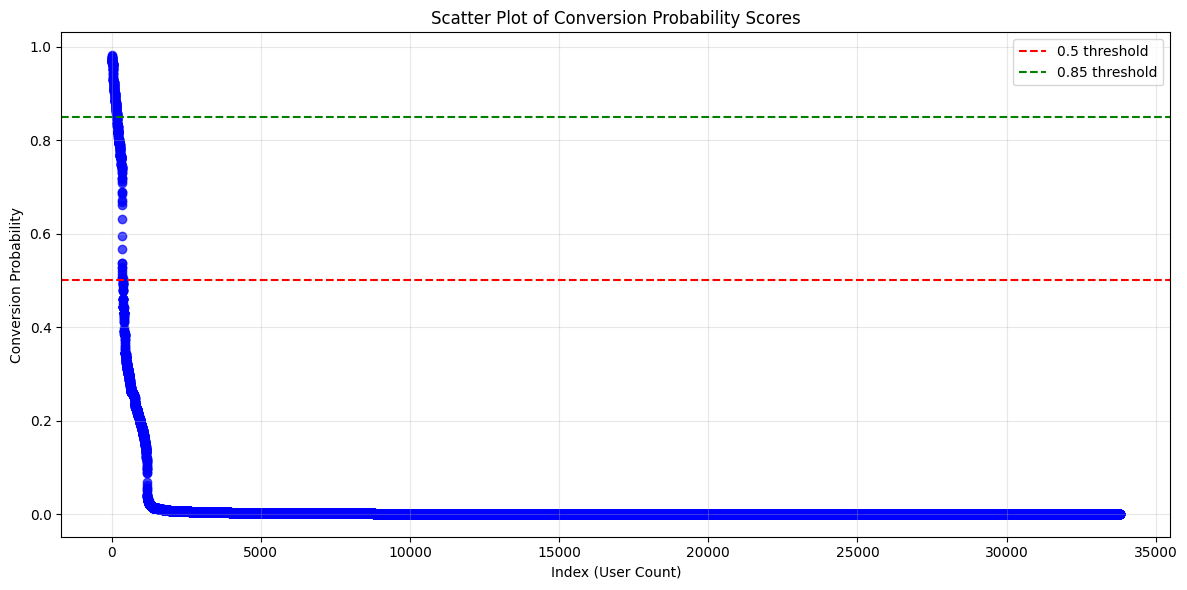

In [26]:
# Create a scatter plot of just the conversion probability scores
plt.figure(figsize=(12, 6))

#order DF by conversion_probability
df = df.sort_values(by='conversion_probability', ascending=False)

# Use index as x-axis to spread out the points
plt.scatter(range(len(df)), df['conversion_probability'], alpha=0.7, color='blue')

# Add a horizontal line at common threshold values
plt.axhline(y=0.5, color='red', linestyle='--', label='0.5 threshold')
plt.axhline(y=0.85, color='green', linestyle='--', label='0.85 threshold')

# Add labels and title
plt.xlabel('Index (User Count)')
plt.ylabel('Conversion Probability')
plt.title('Scatter Plot of Conversion Probability Scores')

# Add legend and grid
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

In [43]:
bins = [0, 0.10, 0.85, 1.0] 
labels = ['LOW', 'MEDIUM', 'HIGH']

df['conversion_probability_group'] = pd.cut(df['conversion_probability'], 
                                           bins=bins, 
                                           labels=labels, 
                                           include_lowest=True)


prob_group_counts = df['conversion_probability_group'].value_counts().sort_index()
print(prob_group_counts)


conversion_probability_group
LOW         12
MEDIUM    1004
HIGH       174
Name: count, dtype: int64


In [ ]:
df

In [17]:
#write to csv
df.to_csv(f'./output/audience_bq_rfc_{datetime.now().strftime("%d%m%Y")}.csv', index=False)